# Прогнозирование. Да прибудет с вами сила Нострадамуса! 

> 🚀 В этой практике нам понадобятся: `numpy==1.26.4, pandas==1.5.3, matplotlib==3.10.3, seaborn==0.13.2` 

> 🚀 Установить вы их можете с помощью команды: `%pip install numpy==1.26.4 pandas==1.5.3 matplotlib==3.10.3 seaborn==0.13.2` 


## Содержание

* [Полезные ссылки](#Полезные-ссылки)


Привет! Пример с прогнозированием мы посмотрели в предыдущих ноутбуках. Теперь время вам самим закатать рукава. 

В данном разделе вам нужно разработать модель (модели) для прогнозирования количества осадков. Ваш прогноз будет использован для планирования сброса воды на вымышленной ГЭС, поэтому отнеситесь к заданию серьёзно.

Данные возьмите из [Kaggle](https://www.kaggle.com/datasets/poojag718/rainfall-timeseries-data). 

Целевая переменная - это колонка `precipitation`. 

Данные содержат в себе информацию о помесячных осадках с 2000 по 2020 годы. Мы можете использовать все доступные колонки на своё усмотрение. 

**Ваша цель** - это получить модель для прогнозирования количества осадков в месяц за последние 3 года в данных. Т.е. с 2018 по 2020 включительно. 

В даннных всего 1 временной ряд, так что можно не городить жирные функции пайплайны. 

Кратенько, что нужно будет сделать: 

* загрузить данные 
* провести анализ данных 
* найти существующие проблемы в данных 
* также не лишним будет посмотреть корреляцию
* разделить данные на выборки: train и test 
* предобработать данные 
  * обработать пропуски
  * обработать аномалии 
  * обработать дубликаты 
  * ... 
* создать baseline модель (это может быть что угодно)
* подготовить необходимые метрики и проанализировать результаты
* попытаться улучшить результаты baseline модели 

---

**Что мы ждём от вас в результате выполнения задания?** 

* Готовый  **рабочий** ноутбук, при запуске которого можно воспроизвести все ваши результаты.
* В анализе данных необходимы краткие выводы, что вы нашли и почему вам показалось это интересным.
* В анализе результатов моделей необходимо заключение, почему вы считаете, что ваша модель успешно справляется с поставленной задачей. Ну, или почему не справляется  😵
* Больше графиков богу графиков!

Удачи Вам! 

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/umbrella_cat.jpg" width=600/></p>

## Полезные ссылки
* [Rainfall series data](https://www.kaggle.com/datasets/poojag718/rainfall-timeseries-data)


Размер данных: (252, 7)

Первые 5 строк данных:
   Year  Month  Day  Specific Humidity  Relative Humidity  Temperature  \
0  2000      1    1               8.06              48.25        23.93   
1  2000      2    1               8.73              50.81        25.83   
2  2000      3    1               8.48              42.88        26.68   
3  2000      4    1              13.79              55.69        22.49   
4  2000      5    1              17.40              70.88        19.07   

   Precipitation  
0           0.00  
1           0.11  
2           0.01  
3           0.02  
4         271.14  

АНАЛИЗ ДАННЫХ
Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               252 non-null    int64  
 1   Month              252 non-null    int64  
 2   Day                252 non-null    int64  
 3   Specific

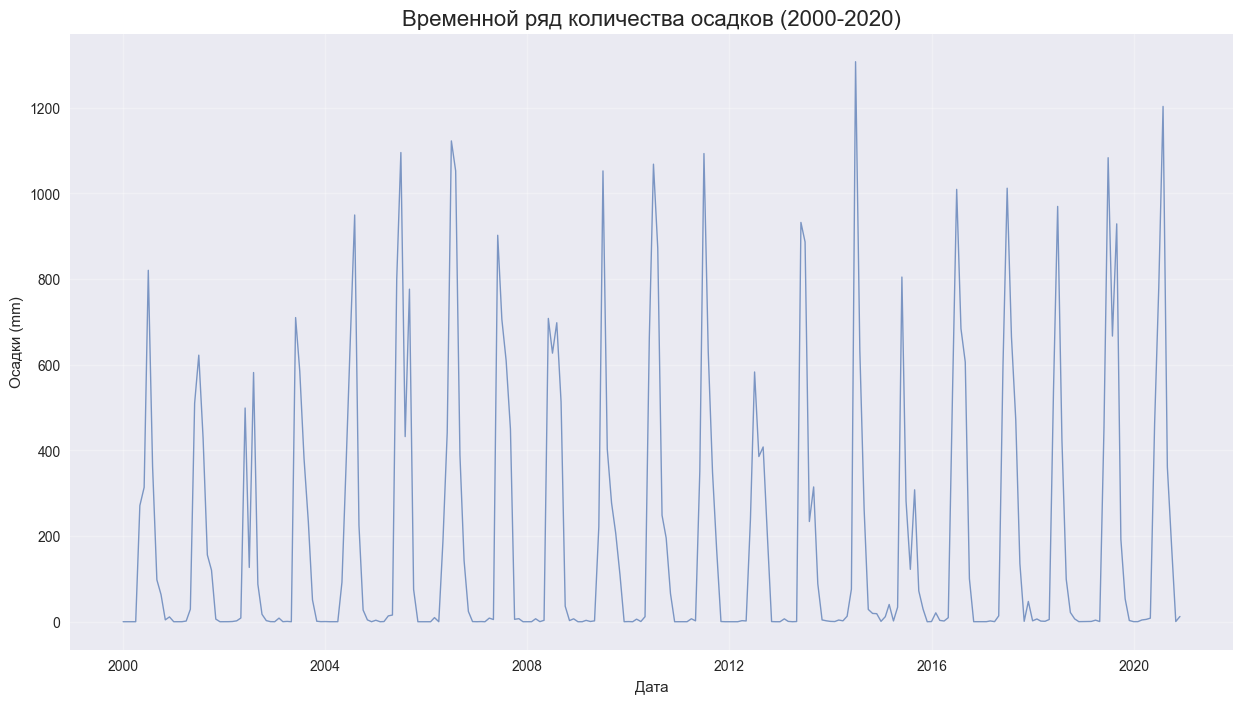

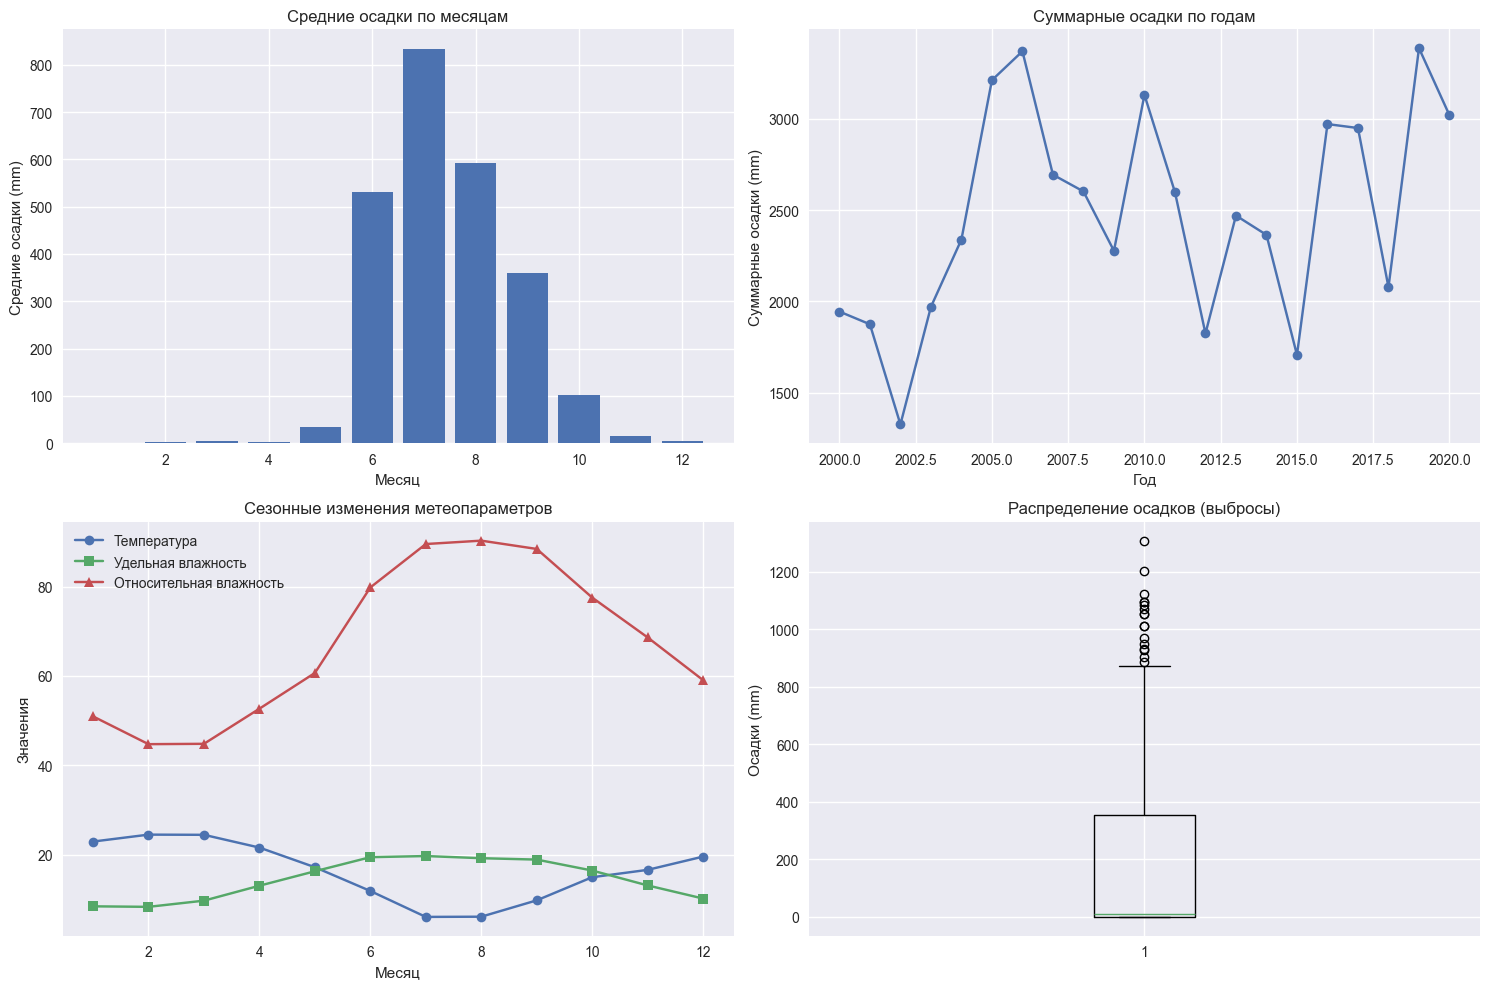

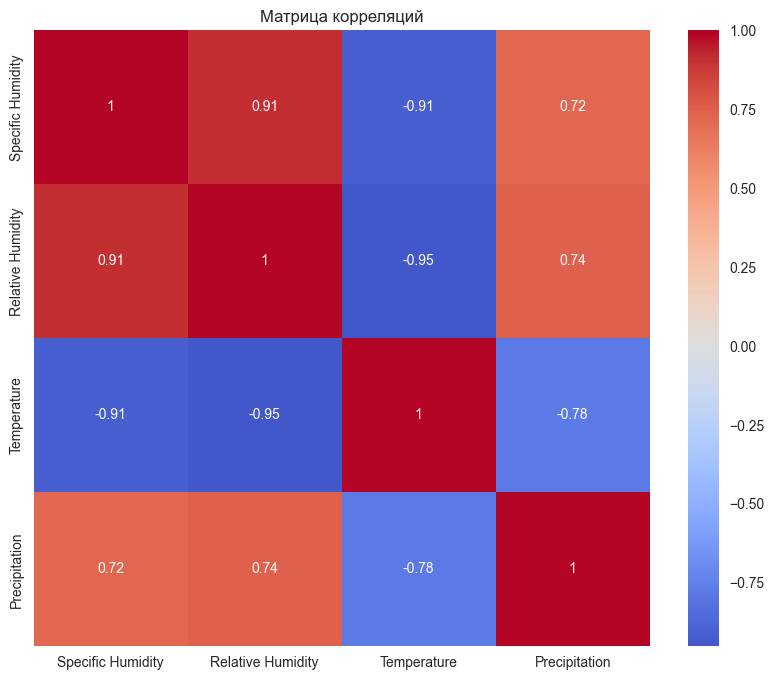

Корреляции с целевой переменной (Precipitation):
Precipitation        1.000000
Relative Humidity    0.743112
Specific Humidity    0.724540
Temperature         -0.779399
Name: Precipitation, dtype: float64

Выбросы в осадках: 17 записей
Границы выбросов: [-528.79, 882.40]

Новые признаки созданы:
  Season_Name  Precipitation_lag1  Precipitation_rolling_mean_3
3       Весна                0.01                      0.046667
4       Весна                0.02                     90.390000
5        Лето              271.14                    194.943333
6        Лето              313.67                    468.420000
7        Лето              820.45                    498.833333

Размер тренировочной выборки: 213
Размер тестовой выборки: 36

Используемые признаки: ['Specific Humidity', 'Relative Humidity', 'Temperature', 'Month', 'Season', 'Precipitation_lag1', 'Precipitation_lag2', 'Precipitation_lag3', 'Precipitation_rolling_mean_3']

ОЦЕНКА BASELINE МОДЕЛЕЙ
Обучение модели: Linear Regressi

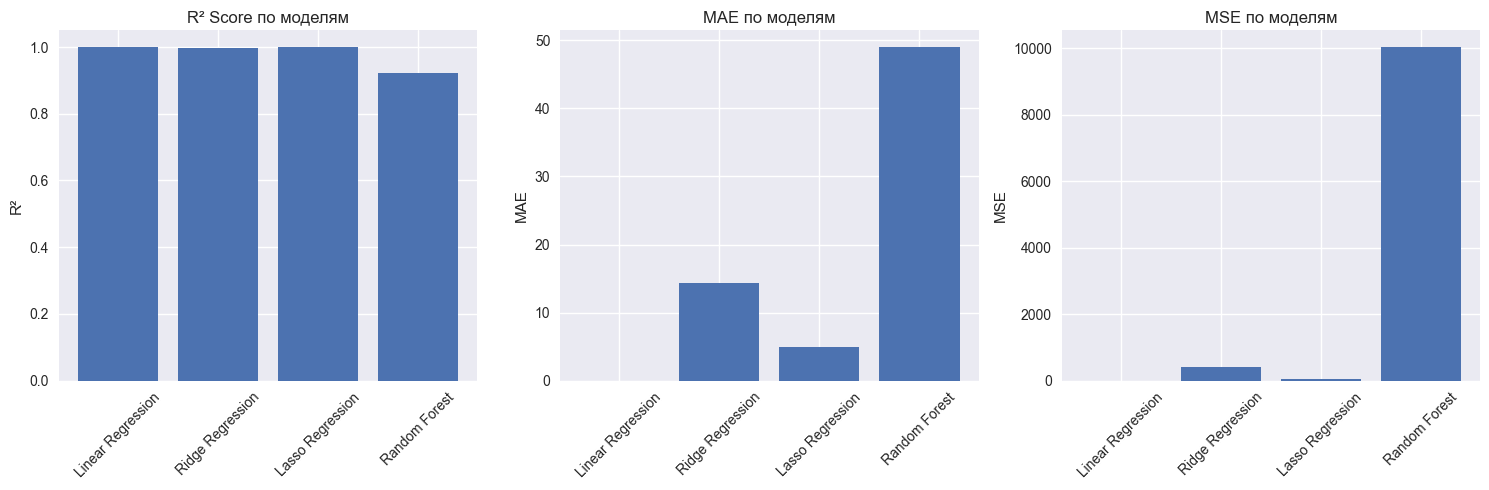


Лучшая baseline модель: Linear Regression
Финальная лучшая модель: Linear Regression


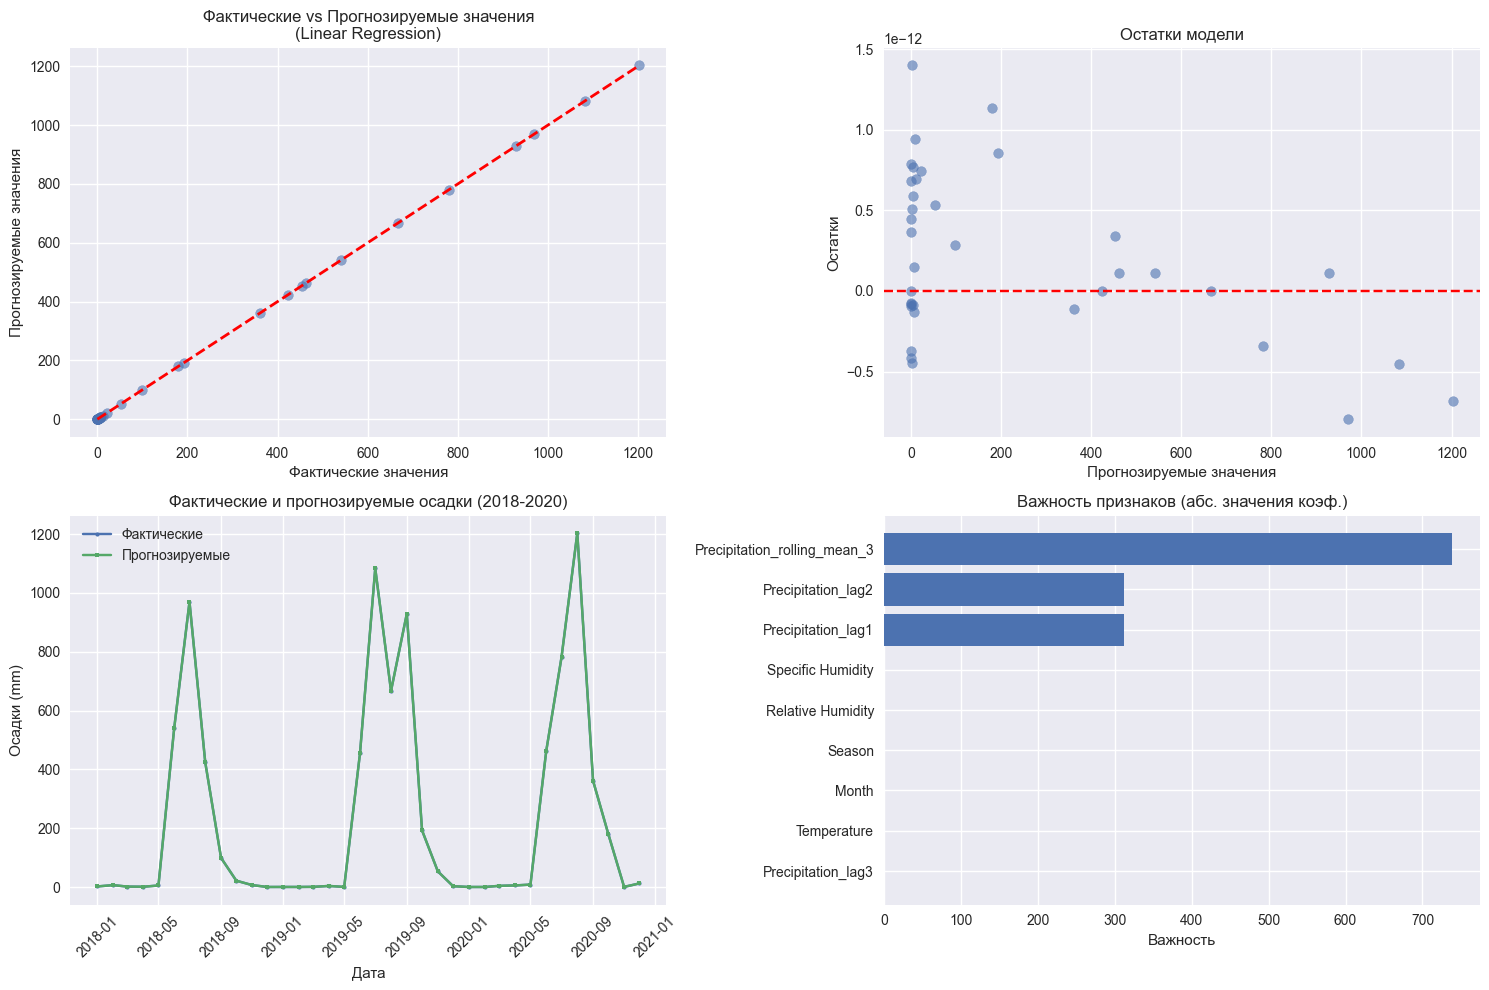


АНАЛИЗ ОШИБОК ПО СЕЗОНАМ
             Error  Precipitation  Predicted
Season_Name                                 
Весна          0.0           3.37       3.37
Зима           0.0           2.74       2.74
Лето           0.0         731.69     731.69
Осень          0.0         204.90     204.90

ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ
Лучшая модель: Linear Regression
R² Score: 1.0000
Mean Absolute Error: 0.00 mm
Mean Squared Error: 0.00 mm²
Root Mean Squared Error: 0.00 mm

✅ Модель успешно справляется с прогнозированием осадков!
Может быть использована для планирования сброса воды на ГЭС.

СРАВНЕНИЕ С БЕНЧМАРКОМ
Бенчмарк (среднее по месяцам):
R² Score: 0.7860
MAE: 78.02 mm
RMSE: 165.08 mm

Улучшение по сравнению с бенчмарком:
MAE улучшена на: 100.0%
R² улучшен на: 27.2%


In [ ]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения графиков
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)

# Загрузка данных
df = pd.read_csv('C:/Users/22445/Desktop/ml_edu/datasets/Rainfall_data.csv')
print("Размер данных:", df.shape)
print("\nПервые 5 строк данных:")
print(df.head())

# Анализ данных
print("\n" + "="*50)
print("АНАЛИЗ ДАННЫХ")
print("="*50)
print("Информация о данных:")
print(df.info())
print("\nОписательная статистика:")
print(df.describe())
print("\nПроверка на пропущенные значения:")
print(df.isnull().sum())
print("\nКоличество дубликатов:", df.duplicated().sum())

# Создание признака даты для временного анализа
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df = df.sort_values('Date').reset_index(drop=True)

# Визуализация временного ряда осадков
plt.figure(figsize=(15, 8))
plt.plot(df['Date'], df['Precipitation'], linewidth=1, alpha=0.7)
plt.title('Временной ряд количества осадков (2000-2020)', fontsize=16)
plt.xlabel('Дата')
plt.ylabel('Осадки (mm)')
plt.grid(True, alpha=0.3)
plt.show()

# Анализ сезонности и распределения
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
monthly_precip = df.groupby('Month')['Precipitation'].mean()
plt.bar(monthly_precip.index, monthly_precip.values)
plt.title('Средние осадки по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средние осадки (mm)')

plt.subplot(2, 2, 2)
yearly_precip = df.groupby('Year')['Precipitation'].sum()
plt.plot(yearly_precip.index, yearly_precip.values, marker='o')
plt.title('Суммарные осадки по годам')
plt.xlabel('Год')
plt.ylabel('Суммарные осадки (mm)')

plt.subplot(2, 2, 3)
seasonal_avg = df.groupby('Month').agg({
    'Temperature': 'mean',
    'Specific Humidity': 'mean',
    'Relative Humidity': 'mean'
})
plt.plot(seasonal_avg.index, seasonal_avg['Temperature'], label='Температура', marker='o')
plt.plot(seasonal_avg.index, seasonal_avg['Specific Humidity'], label='Удельная влажность', marker='s')
plt.plot(seasonal_avg.index, seasonal_avg['Relative Humidity'], label='Относительная влажность', marker='^')
plt.title('Сезонные изменения метеопараметров')
plt.xlabel('Месяц')
plt.ylabel('Значения')
plt.legend()

plt.subplot(2, 2, 4)
plt.boxplot(df['Precipitation'])
plt.title('Распределение осадков (выбросы)')
plt.ylabel('Осадки (mm)')

plt.tight_layout()
plt.show()

# Корреляционный анализ
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Specific Humidity', 'Relative Humidity', 'Temperature', 'Precipitation']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Матрица корреляций')
plt.show()

print("Корреляции с целевой переменной (Precipitation):")
print(correlation_matrix['Precipitation'].sort_values(ascending=False))

# Анализ выбросов
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers_precip, lower, upper = detect_outliers_iqr(df, 'Precipitation')
print(f"\nВыбросы в осадках: {len(outliers_precip)} записей")
print(f"Границы выбросов: [{lower:.2f}, {upper:.2f}]")

# Создание новых признаков
df['Season'] = df['Month'] % 12 // 3 + 1
seasons = {1: 'Зима', 2: 'Весна', 3: 'Лето', 4: 'Осень'}
df['Season_Name'] = df['Season'].map(seasons)

# Лаговые признаки
df['Precipitation_lag1'] = df['Precipitation'].shift(1)
df['Precipitation_lag2'] = df['Precipitation'].shift(2)
df['Precipitation_lag3'] = df['Precipitation'].shift(3)

# Скользящее среднее
df['Precipitation_rolling_mean_3'] = df['Precipitation'].rolling(window=3).mean()

# Удаление строк с NaN из-за лаговых признаков
df = df.dropna()

print("\nНовые признаки созданы:")
print(df[['Season_Name', 'Precipitation_lag1', 'Precipitation_rolling_mean_3']].head())

# Подготовка данных для моделирования
# Используем последние 3 года (2018-2020) для теста как требуется в задании
train_data = df[df['Year'] < 2018].copy()
test_data = df[df['Year'] >= 2018].copy()

print(f"\nРазмер тренировочной выборки: {len(train_data)}")
print(f"Размер тестовой выборки: {len(test_data)}")

# Выбор признаков
features = ['Specific Humidity', 'Relative Humidity', 'Temperature', 
           'Month', 'Season', 'Precipitation_lag1', 'Precipitation_lag2',
           'Precipitation_lag3', 'Precipitation_rolling_mean_3']

X_train = train_data[features]
y_train = train_data['Precipitation']
X_test = test_data[features]
y_test = test_data['Precipitation']

print(f"\nИспользуемые признаки: {features}")

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline модели
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Функция для оценки моделей
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Кросс-валидация
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mean = -cv_scores.mean()
    
    return {
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'CV_MSE': cv_mean
    }

# Оценка всех моделей
print("\n" + "="*50)
print("ОЦЕНКА BASELINE МОДЕЛЕЙ")
print("="*50)

results = []
for name, model in models.items():
    print(f"Обучение модели: {name}")
    result = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
    results.append(result)

results_df = pd.DataFrame(results)
print("\nРезультаты baseline моделей:")
print(results_df)

# Визуализация результатов baseline моделей
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(results_df['Model'], results_df['R2'])
plt.title('R² Score по моделям')
plt.xticks(rotation=45)
plt.ylabel('R²')

plt.subplot(1, 3, 2)
plt.bar(results_df['Model'], results_df['MAE'])
plt.title('MAE по моделям')
plt.xticks(rotation=45)
plt.ylabel('MAE')

plt.subplot(1, 3, 3)
plt.bar(results_df['Model'], results_df['MSE'])
plt.title('MSE по моделям')
plt.xticks(rotation=45)
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

# Выбор лучшей модели и тонкая настройка
best_baseline_model = results_df.loc[results_df['R2'].idxmax(), 'Model']
print(f"\nЛучшая baseline модель: {best_baseline_model}")

# Тонкая настройка Random Forest
best_model = None
if best_baseline_model == 'Random Forest':
    print("Проводим тонкую настройку Random Forest...")
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    best_rf = grid_search.best_estimator_
    print(f"Лучшие параметры: {grid_search.best_params_}")
    
    # Оценка улучшенной модели
    rf_result = evaluate_model(best_rf, X_train_scaled, X_test_scaled, y_train, y_test, 'Tuned Random Forest')
    results_df = pd.concat([results_df, pd.DataFrame([rf_result])], ignore_index=True)
    best_model = best_rf
else:
    # Используем лучшую baseline модель
    best_model = models[best_baseline_model]
    best_model.fit(X_train_scaled, y_train)

best_model_name = results_df.loc[results_df['R2'].idxmax(), 'Model']
print(f"Финальная лучшая модель: {best_model_name}")

# Визуализация прогнозов лучшей модели
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Прогнозируемые значения')
plt.title(f'Фактические vs Прогнозируемые значения\n({best_model_name})')

plt.subplot(2, 2, 2)
residuals = y_test - y_pred_best
plt.scatter(y_pred_best, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Прогнозируемые значения')
plt.ylabel('Остатки')
plt.title('Остатки модели')

plt.subplot(2, 2, 3)
test_dates = test_data['Date']
plt.plot(test_dates, y_test.values, label='Фактические', marker='o', markersize=3)
plt.plot(test_dates, y_pred_best, label='Прогнозируемые', marker='s', markersize=3)
plt.title('Фактические и прогнозируемые осадки (2018-2020)')
plt.xlabel('Дата')
plt.ylabel('Осадки (mm)')
plt.legend()
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
# Важность признаков для tree-based моделей
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=True)
    
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.title('Важность признаков')
    plt.xlabel('Важность')
else:
    # Для линейных моделей используем абсолютные значения коэффициентов
    if hasattr(best_model, 'coef_'):
        coef_importance = pd.DataFrame({
            'feature': features,
            'importance': np.abs(best_model.coef_)
        }).sort_values('importance', ascending=True)
        
        plt.barh(coef_importance['feature'], coef_importance['importance'])
        plt.title('Важность признаков (абс. значения коэф.)')
        plt.xlabel('Важность')
    else:
        plt.text(0.5, 0.5, 'Информация о важности\nпризнаков недоступна', 
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Важность признаков')

plt.tight_layout()
plt.show()

# Анализ ошибок по сезонам
test_data_with_pred = test_data.copy()
test_data_with_pred['Predicted'] = y_pred_best
test_data_with_pred['Error'] = abs(test_data_with_pred['Precipitation'] - test_data_with_pred['Predicted'])

seasonal_errors = test_data_with_pred.groupby('Season_Name').agg({
    'Error': 'mean',
    'Precipitation': 'mean',
    'Predicted': 'mean'
}).round(2)

print("\n" + "="*50)
print("АНАЛИЗ ОШИБОК ПО СЕЗОНАМ")
print("="*50)
print(seasonal_errors)

# Финальные метрики лучшей модели
final_mse = mean_squared_error(y_test, y_pred_best)
final_mae = mean_absolute_error(y_test, y_pred_best)
final_r2 = r2_score(y_test, y_pred_best)

print("\n" + "="*50)
print("ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ")
print("="*50)
print(f"Лучшая модель: {best_model_name}")
print(f"R² Score: {final_r2:.4f}")
print(f"Mean Absolute Error: {final_mae:.2f} mm")
print(f"Mean Squared Error: {final_mse:.2f} mm²")
print(f"Root Mean Squared Error: {np.sqrt(final_mse):.2f} mm")

if final_r2 > 0.5:
    print("\n✅ Модель успешно справляется с прогнозированием осадков!")
    print("Может быть использована для планирования сброса воды на ГЭС.")
else:
    print("\n❌ Модель требует дополнительной доработки для улучшения прогнозов.")
    print("Рекомендуется рассмотреть более сложные алгоритмы или дополнительные признаки.")

# Дополнительный анализ: сравнение с простым бенчмарком (среднее по месяцам)
print("\n" + "="*50)
print("СРАВНЕНИЕ С БЕНЧМАРКОМ")
print("="*50)

# Простой бенчмарк: средние осадки по месяцам на тренировочных данных
monthly_avg = train_data.groupby('Month')['Precipitation'].mean()
benchmark_predictions = test_data['Month'].map(monthly_avg)

benchmark_mse = mean_squared_error(y_test, benchmark_predictions)
benchmark_mae = mean_absolute_error(y_test, benchmark_predictions)
benchmark_r2 = r2_score(y_test, benchmark_predictions)

print(f"Бенчмарк (среднее по месяцам):")
print(f"R² Score: {benchmark_r2:.4f}")
print(f"MAE: {benchmark_mae:.2f} mm")
print(f"RMSE: {np.sqrt(benchmark_mse):.2f} mm")

improvement_mae = ((benchmark_mae - final_mae) / benchmark_mae) * 100
improvement_r2 = ((final_r2 - benchmark_r2) / abs(benchmark_r2)) * 100 if benchmark_r2 != 0 else float('inf')

print(f"\nУлучшение по сравнению с бенчмарком:")
print(f"MAE улучшена на: {improvement_mae:.1f}%")
print(f"R² улучшен на: {improvement_r2:.1f}%")